# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'lab 2 data/train.p' # The training data set contains 39,209 training images in 43 classes
testing_file = 'lab 2 data/test.p' # The test dataset contains 12,630 test images or the corresponding pre-calculated features in random order. 

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Finished loading pickle files!")
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

Finished loading pickle files!


In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


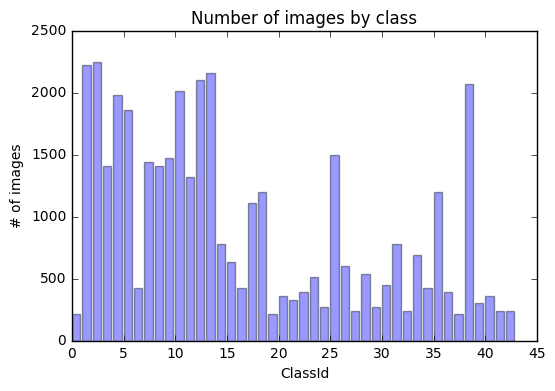

The class with most instances has ClassId 2 with a total of 2250 instances.


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Count the number of instances of each class
D = Counter()
for n_class in y_train:
    D[n_class] += 1
  
# Visualize in a bar chart the number of instances of each class
index = np.arange(n_classes)
bar_width = 0.8
opacity = 0.4
rects = plt.bar(index, D.values(), bar_width,
                 alpha=opacity,
                 color='b',
                 align='edge',
                 orientation='vertical')
plt.xlabel('ClassId')
plt.ylabel('# of images')
plt.title('Number of images by class')
# plt.tight_layout()
plt.show()

# Print class with most instances
c_most = D.most_common(1)
print("The class with most instances has ClassId", c_most[0][0], "with a total of", c_most[0][1], "instances.")

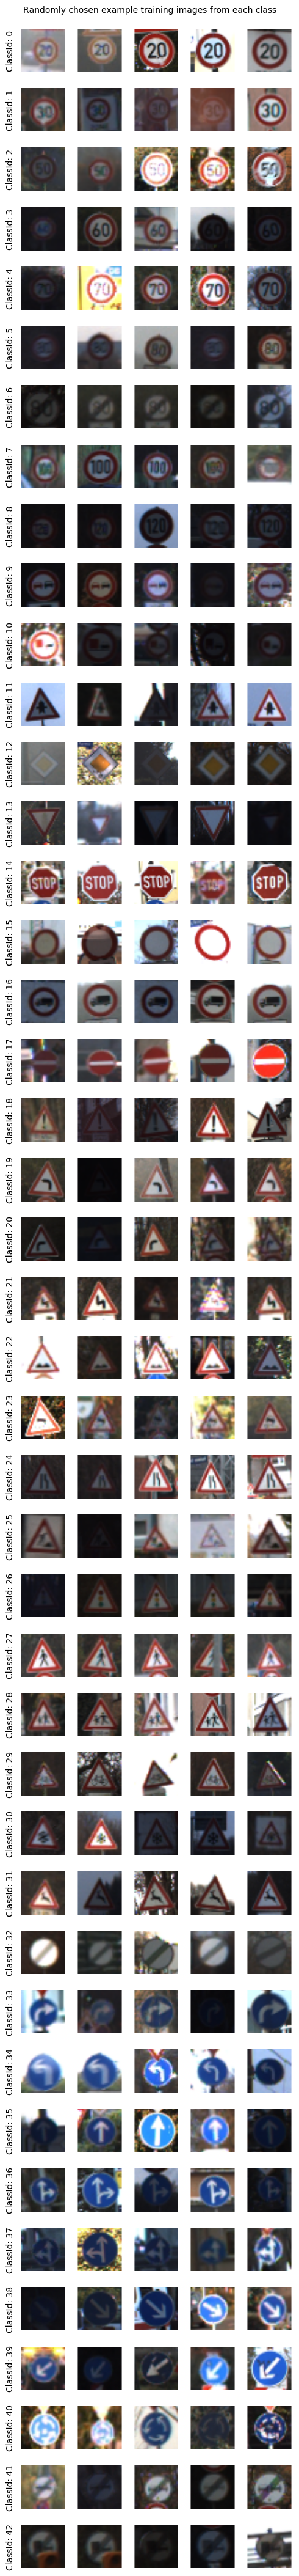

In [4]:
import numpy.random as rnd
# Visualize class and a few example images from each class
n_cols = 5

fig, ax = plt.subplots(nrows=n_classes, ncols=n_cols, sharex=True, sharey=True)
fig.set_size_inches(n_cols, n_classes)
fig.suptitle('Randomly chosen example training images from each class')
for i in range(n_classes):
    for j in range(n_cols):
        cell = ax[i][j]
        cell.spines['top'].set_visible(False)
        cell.spines['right'].set_visible(False)
        cell.spines['bottom'].set_visible(False)
        cell.spines['left'].set_visible(False)
        if j == 0:
            cell.set_ylabel("ClassId: " + str(i))
        img = X_train[y_train == i][rnd.choice(len(X_train[y_train == i]), replace=False)]
        cell.imshow(img)
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
plt.tight_layout(rect=[0, 0, 1, 0.975]) #left, bottom, right, top
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

# Convert images to grayscale space
# Normalize using CLAHE
print("Started normalizing!")

X_train_gray = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2]], np.uint8)
for i in range(len(X_train)):
    X_train_gray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    X_train_gray[i] = clahe.apply(X_train_gray[i])
X_train = X_train_gray
  
X_test_gray = np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2]], np.uint8)
for i in range(len(X_test)):
    X_test_gray[i] = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    X_test_gray[i] = clahe.apply(X_test_gray[i])
X_test = X_test_gray
           
print("Finished normalizing!")

Started normalizing!
Finished normalizing!


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

1. All images are converted from RGB to grayscale. The [Sermanet and LeCun paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) mentions that additional experiments with grayscale images established a new record accuracy of 99.17 (vs. 98.97% accuracy on the phase 1 test set.) This may be due to the type of images that we're working on (i.e. signs) and grayscale tends to enhance shape differences which are more important for classification than for example red color shade differences in regulatory signs. 
2. The images are preprocessed with CLAHE (Contrast Limited Adaptive Histogram Equalization.) The [Sermanet and LeCun paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) mentions they converted the image from RGB to YUY then the Y channel is then preprocessed with global and local contrast normalization. I did not apply global normalization but used CLAHE - a "localized" (to small image blocks called tiles) histogram equalization which boosts contrast and is very useful for improving over or under-exposed photos (e.g. taken at night or at low light) or enhancing signs and symbols' edges.

In [6]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Based on image jittering code snippet by Vivek Yadav
# https://carnd-forums.udacity.com/questions/10322627/project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    A Random uniform distribution is used to generate different parameters for transformation
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    if len(img.shape) > 2:
        rows,cols,ch = img.shape    
    else:
        rows,cols = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

In [7]:
# Create jittered dataset so we can get at least 2250 samples of each class.
# (Class 2 has the most instances - 2250 so we want all classes to have the same number of instances as class 2.)
# Create up to 5 jittered images of each instance of each class until we get to 2250

print("start jittering!")
#for i in range(len(X_train)):
for c in range(n_classes):
    print("Started processing ClassId:",c)
    nj_inst = D[c] #number of non-jittered instances
    while D[c] < 2250:
        rand = rnd.choice(nj_inst, replace=False)
        img = X_train[y_train == c][rand]
        for j in range(5):
            t_f = transform_image(img, 15, 0, 2)
            t_f = t_f[np.newaxis, :]
            t_l = np.array(c)
            t_l = t_l[np.newaxis]
            X_train = np.concatenate((X_train, t_f))
            y_train = np.concatenate((y_train, t_l))
        D[c] += 5
    print("Finished processing ClassId:",c)
print("done jittering!")
       
# Save preprocessed training data into pickle file
p_training_file = 'lab 2 data/p_train.p'

with open(p_training_file, mode='wb') as f:
    pickle.dump({'features' : X_train, 'labels' : y_train}, f)
    
# Save preprocessed testing data into pickle file
p_testing_file = 'lab 2 data/p_test.p'

with open(p_testing_file, mode='wb') as f:
    pickle.dump({'features' : X_test, 'labels' : y_test}, f)

start jittering!
Started processing ClassId: 0
Finished processing ClassId: 0
Started processing ClassId: 1
Finished processing ClassId: 1
Started processing ClassId: 2
Finished processing ClassId: 2
Started processing ClassId: 3
Finished processing ClassId: 3
Started processing ClassId: 4
Finished processing ClassId: 4
Started processing ClassId: 5
Finished processing ClassId: 5
Started processing ClassId: 6
Finished processing ClassId: 6
Started processing ClassId: 7
Finished processing ClassId: 7
Started processing ClassId: 8
Finished processing ClassId: 8
Started processing ClassId: 9
Finished processing ClassId: 9
Started processing ClassId: 10
Finished processing ClassId: 10
Started processing ClassId: 11
Finished processing ClassId: 11
Started processing ClassId: 12
Finished processing ClassId: 12
Started processing ClassId: 13
Finished processing ClassId: 13
Started processing ClassId: 14
Finished processing ClassId: 14
Started processing ClassId: 15
Finished processing ClassId


## After preprocessing the training images you can start from here to save time


In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Open preprocessed training data from pickle file
# Open testing data from picke file
p_training_file = 'lab 2 data/p_train.p'
p_testing_file = 'lab 2 data/p_test.p'
with open(p_training_file, mode='rb') as f:
    train = pickle.load(f)
with open(p_testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']  
X_test, y_test = test['features'], test['labels']

n_train = len(X_train)
print("Number of training examples (before split) =", n_train)

# Split the training set into training and validation, in a stratified fashion
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify = y_train)

n_train = len(X_train)
print("Number of training examples (after split) =", n_train)

n_valid = len(X_valid)
print("Number of validation examples =", n_valid)

n_classes = len(set(y_train))
print("Number of classes =", n_classes)

n_test = len(X_test)
print("Number of testing examples =", n_test)

# One-hot encode labels
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)
y_test = y_test.astype(np.float32)

Number of training examples (before split) = 96754
Number of training examples (after split) = 72565
Number of validation examples = 24189
Number of classes = 43
Number of testing examples = 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
1. I generated additional data to have at least 2250 instances of each class (2250 was the maximun number of instances for a class in the original set of classes.) This is done to reduce biases towards the classes that have more data.
2. Additional data was generated by randomly applying rotation (+- 15 degrees) and translation (+- 2 pixels). Shearing was not used for this purpose.
3. After additional data generation, the number of training examples increased from 39209 to 96754. This training dataset was then split into two subsets - training (75% or 72565 examples) and validation (25% or 24189 examples), split in a stratified fashion (i.e. making the number of instances of each class similar.)
4. The test dataset was not split and still holds 12630 examples.
5. All labels (training, validation and testing) were one-hot encoded.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Based on LeNet CNN Architecture (http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> CONV -> ACT -> FLATTEN -> FC -> ACT -> FC
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

# Hyperparameters
EPOCHS = 30
BATCH_SIZE = 125

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)

# Helper functions
# conv2D wrapper, with bias and relu activation
def conv2d(x, W, b, strides=1, padding='VALID'):   
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# max_pool wrapper
def maxpool2d(x, k=2, padding='VALID'):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)

# Get batch from a dataset
# Adapted from code by Dmytro Filatov
# https://carnd-forums.udacity.com/questions/18448565/help-in-writing-a-nextbatch-function-similar-to-the-one-used-in-the-tensorflow-cnn-tutorial
def get_batch(step=1, batch_size=50, dataset=None):
    # If we step over the total number of examples in the dataset
    # return random examples from dataset
    if ((step - 1) * batch_size) >= dataset[0].shape[0]: 
        from sklearn.utils import shuffle
        x, y = shuffle(dataset[0], dataset[1], n_samples = batch_size)
    else:
        x = dataset[0][(step - 1) * batch_size : step * batch_size]
        y = dataset[1][(step - 1) * batch_size : step * batch_size]
    return x, y
        
# Given a dataset as input returns the loss and accuracy.
def eval_data(dataset):
    steps_per_epoch = len(dataset[0]) // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    for step in range(steps_per_epoch):
        batch_x, batch_y = get_batch(step+1, BATCH_SIZE, dataset)
        loss, acc = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

In [10]:
# LeNet CNN Architecture
def LeNet(x):
    #Hyperparameters
    mu = 0
    sigma = 0.1
   
    # Reshape from 2D to 4D. This prepares the data for
    # convolutional and pooling layers.
    x = tf.reshape(x, (-1, 32, 32, 1))
    # No need to pad as the data is (32, 32, 1) already
    n_classes = 43 # 43 types of signs in the German Traffic Signs Dataset
    
    #Layer Widths
    layer_width = { # 6, 16, 120, 84
        'layer_1': 32,
        'layer_2': 64,
        'layer_3': 128,
        'fully_connected': 512
    }
    
    #Weights and Biases
    weights = {
        # [filter_height, filter_width, in_channels, out_channels]
        'layer_1': tf.Variable(tf.truncated_normal([5, 5, 1, layer_width['layer_1']], mean = mu, stddev = sigma)),
        'layer_2': tf.Variable(tf.truncated_normal([5, 5, layer_width['layer_1'], layer_width['layer_2']], mean = mu, stddev = sigma)),
        'layer_3': tf.Variable(tf.truncated_normal([5, 5, layer_width['layer_2'], layer_width['layer_3']], mean = mu, stddev = sigma)),
        'fully_connected': tf.Variable(tf.truncated_normal([layer_width['layer_3'], layer_width['fully_connected']], mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal([layer_width['fully_connected'], n_classes], mean = mu, stddev = sigma))
    }
      
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
        'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
        'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
        'out': tf.Variable(tf.zeros(n_classes))
    }
    
    # 32x32x1 to 28x28x32
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    # 28x28x32 to 14x14x32
    conv1 = maxpool2d(conv1)
    
    # 14x14x32 to 10x10x64
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    # 10x10x64 to 5x5x64
    conv2 = maxpool2d(conv2)
    
    # 5x5x64 to 1x1x128
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    
    # 1x1x128 to 128
    fc0 = flatten(conv3)
    
    # 128 to 512
    fc1 = tf.add(
        tf.matmul(fc0, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)
    
    # 512 to 43
    logits = tf.add(
            tf.matmul(fc1, weights['out']),
            biases['out'])
    
    # Return the result of the last fully connected layer.
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
- There is a total of 6 main layers in the following order: Convolution, Pooling, Convolution, Pooling, Convolution, Fully connected.
- Convolution layers are using a default stride size of 1 and valid padding.
    - The 1st convolution layer takes a 32x32x1 input shape and returns a 28x28x32 output shape, using a filter size of 5x5.
    - The 2nd convolution layer takes a 14x14x32 input shape and returns a 10x10x64 output shape, using a filter size of 5x5.
    - The 3rd convolution layer takes a 5x5x64 input shape and returns a 1x1x128 output shape, using a filter size of 5x5.
- For activation I'm using Rectified Linear Unit (ReLU) functions instead of sigmoid functions (also tried with tanh functions but ReLU gave better accuracy results.)
    - There are activations after each convolution layer and after the 1st fully connected layer.
- For Pooling layers I am using MaxPooling with kernel size of 2 and valid padding.
    - The 1st pooling layer takes a 28x28x32 input shape and returns a 14x14x32 output shape.
    - The 2nd pooling layer takes a 10x10x64 input shape and returns a 5x5x64 output shape.
- The output of the 3rd convolution layer gets flattened from 1x1x128 to 128 before sending it to the 1st fully connected layer, which returns 512 outputs.
- The final layer, a 2nd fully connected layer has 512 inputs and 43 outputs.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Hyperparameters
rate = 0.001

# The German Traffic Signs Dataset consists of 32x32x3 RGB images
# converted to grayscale (32x32x1) during preprocessing
x = tf.placeholder(tf.float32, (None, 32, 32))
# We classify over 43 sign types
y = tf.placeholder(tf.int32, (None))

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# File path to save tensorflow model
model_file = 'lab 2 data/model_lenet.ckpt'
# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        steps_per_epoch = len(X_train) // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE

        # Train model
        for i in range(EPOCHS):
            # Shuffle training data
            X_train, y_train = shuffle(X_train, y_train)
            for step in range(steps_per_epoch):
                batch_x, batch_y = get_batch(step+1, BATCH_SIZE, [X_train, y_train])
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            # Evaluate on the validation data
            val_loss, val_acc = eval_data([X_valid, y_valid])
            print("EPOCH {} ...".format(i+1))
            print("Validation loss = {:.3f}".format(val_loss))
            print("Validation accuracy = {:.3f}".format(val_acc))
            print()

        # Evaluate on the test data
        test_loss, test_acc = eval_data([X_test, y_test])
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))
        
        # Save the model
        saver.save(sess, model_file)
        print('Trained Model Saved.')

EPOCH 1 ...
Validation loss = 1.687
Validation accuracy = 0.544

EPOCH 2 ...
Validation loss = 0.734
Validation accuracy = 0.799

EPOCH 3 ...
Validation loss = 0.456
Validation accuracy = 0.872

EPOCH 4 ...
Validation loss = 0.330
Validation accuracy = 0.906

EPOCH 5 ...
Validation loss = 0.235
Validation accuracy = 0.937

EPOCH 6 ...
Validation loss = 0.214
Validation accuracy = 0.942

EPOCH 7 ...
Validation loss = 0.217
Validation accuracy = 0.943

EPOCH 8 ...
Validation loss = 0.151
Validation accuracy = 0.962

EPOCH 9 ...
Validation loss = 0.252
Validation accuracy = 0.946

EPOCH 10 ...
Validation loss = 0.144
Validation accuracy = 0.967

EPOCH 11 ...
Validation loss = 0.177
Validation accuracy = 0.961

EPOCH 12 ...
Validation loss = 0.180
Validation accuracy = 0.966

EPOCH 13 ...
Validation loss = 0.149
Validation accuracy = 0.970

EPOCH 14 ...
Validation loss = 0.191
Validation accuracy = 0.962

EPOCH 15 ...
Validation loss = 0.177
Validation accuracy = 0.961

EPOCH 16 ...
Valida

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

The model was trained using an AdamOptimizer with the following hyperparameters:
- learning rate = 0.001
- batch size = 125
- epochs = 30

After 30 epochs I got the following results
- Validation accuracy = 0.987
- Test accuracy = 0.944

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

- I started with the code I created during the LeNet in TensorFlow Lab, which is a CNN based on the [LeNet architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf). 
- Then I reviewed the provided an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) for inspiration on techniques for image preprocessing (RGB to YUV, RGB to grayscale) and generation of additional data (i.e. jittering.)
- Once the architecture was setup, I played around with the hyperparameters until I was satisfied with the accuracy of the overall model.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

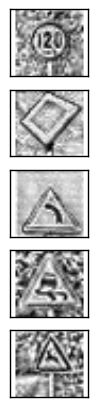

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# I collected 5 32x32 images of traffic signs that correspond to one of the 43 classes we used
filepath = 'lab 2 data/'
files = ['8_2.jpg', '12_2.jpg', '19_2.jpg', '23_2.jpg', '31_2.jpg']
labels = [8, 12, 19, 23, 31]
images = []

# Loads the image, converts it into grayscale,
# puts it into a numpy array and normalizes it using CLAHE
def imageLoad(name):
    im = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    im = clahe.apply(im)
    return im

# Load and preprocess images
for file in range(len(files)):
    images.append(imageLoad(filepath + files[file]))

# One-hot encode labels
labels_oh = np.eye(43)[labels]

# Plot images
fig, ax = plt.subplots(nrows=len(images), ncols=1, sharex=True, sharey=True)
fig.set_size_inches(1, len(images))
for i in range(len(images)):
    cell = ax[i]
    img = images[i]
    cell.imshow(img, cmap='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
- Some images are taken in exagerated angles (e.g. from below, from above.)
- Most images have busy backgrounds (e.g. trees, branches, sky)
- The sign only is not centered in the image or it covers only a small area of the image.

In [74]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# File path to restore tensorflow model
model_file = 'lab 2 data/model_lenet.ckpt'
# Class to restore trained model
# saver = tf.train.Saver()

# Restore trained model and check accuracy with new images
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, model_file)
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: images, y: labels_oh})
    
print('Test Accuracy: {:.3f}'.format(test_accuracy))

Test Accuracy: 0.400


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

No. When used captured pictures, the model had only an accuracy of 40% compared to 94.4% when testing on the dataset.

Probabilities:
[[  9.99997735e-01   2.30121509e-06   1.39679679e-09   7.54221352e-10
    3.26010385e-10]
 [  1.00000000e+00   3.26226379e-10   7.22423720e-19   7.08601444e-21
    2.44623101e-26]
 [  1.00000000e+00   6.90958928e-24   8.05639730e-25   1.87680944e-31
    4.71956462e-36]
 [  1.00000000e+00   2.95817884e-11   9.00549788e-20   3.36732503e-23
    2.01075699e-26]
 [  1.00000000e+00   7.48458351e-20   4.82813562e-20   1.14643913e-24
    5.04452735e-25]]
Class ids:
[[ 8  5  7  2  1]
 [13 12 40 34 17]
 [19 21 24 31 29]
 [12 17 37 36 35]
 [17 12  5 36  9]]


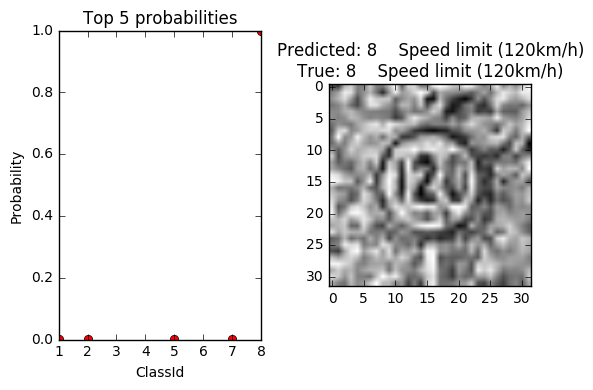

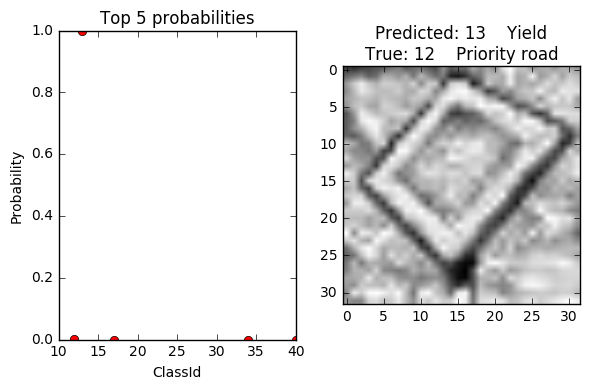

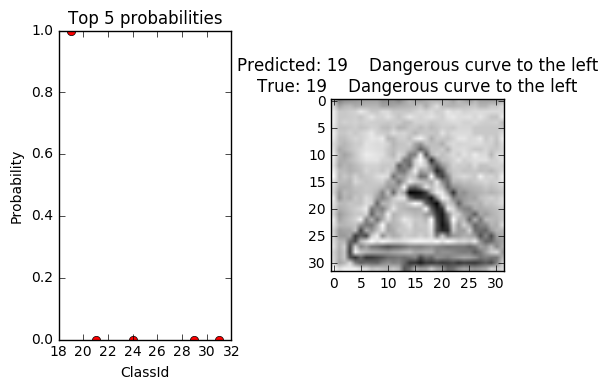

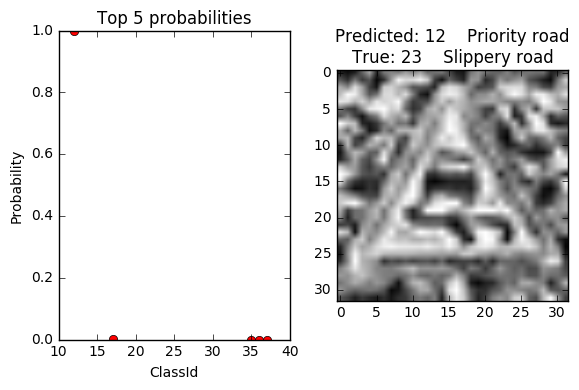

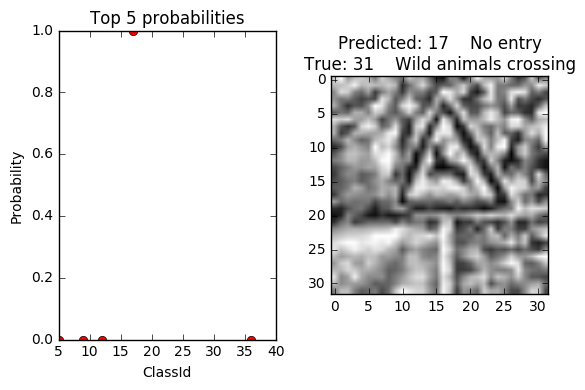

In [76]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import pandas

# Read CSV file with sign names
sign_labels = pandas.read_csv('signnames.csv')

# Helper function to draw graph of probabilites
# Together with image, predicted and true values
def visualize_softmax_probs(probs, classIDs, image, label):
    fig, ax = plt.subplots(nrows = 1, ncols = 2)
    ax = ax.flatten()
    ax[0].set_title('Top 5 probabilities')
    ax[0].plot(classIDs, probs, 'ro')  
    ax[0].set_ylabel('Probability')
    ax[0].set_xlabel('ClassId')
    
    top = probs.argmax()
    class_id = classIDs[top]
    predicted = sign_labels[sign_labels['ClassId']==class_id]['SignName'].to_string()
    true_class = sign_labels[sign_labels['ClassId']==label]['SignName'].to_string()
    ax[1].set_title("Predicted: %s\nTrue: %s" % (predicted, true_class))
    ax[1].imshow(image, cmap='gray')
    plt.tight_layout()
    plt.show()

# Restore session, calculate softmax and print probabilities and top 5 class IDs.
with tf.Session() as sess:
    saver.restore(sess, model_file)
            
    pred = tf.nn.softmax(logits)
    top5pred = tf.nn.top_k(pred, k=5)
    
    print("Probabilities:")
    probs = top5pred.values.eval({x: images}, session=sess)
    print(probs)
    
    print("Class ids:")
    classIDs = top5pred.indices.eval({x: images}, session=sess)
    print(classIDs)
    
    for p, c, i, l in zip(probs, classIDs, images, labels):
        visualize_softmax_probs(p, c, i, l)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
- The model was highly certain of all the predictions.
- The model incorrectly predicted:
  - 13: Yield, when the true class was 12: Priority road. The correct prediction was 2nd on the top 5 predictions.
  - 12: Priority road, when the true clas was 23: Slippery road. The correct prediction was NOT on the top 5 predictions.
  - 17: No entry, when the true clas was 31: Wild animals crossing. The correct prediction was NOT on the top 5 predictions.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

The CNN model was saved and then restored using tf.train.Saver

In order to supply the model with images equivalent to those used for training, validation and testing:
- Five 32x32 images were loaded into a numpy.ndarray using cv2.imread.
- The images were converted to grayscale and normalized using CLAHE.
- Labels were hot-encoded.

The restored CNN model was used to check the model accuracy with the new images.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.